In [1]:
#Install what is needed
!pip install pandas numpy matplotlib xarray hvplot
!pip install rasterio
!pip install rioxarray
!pip install fiona 
!pip install geopandas
!pip install cartopy
!pip install geopandas geoviews
!pip install netCDF4
!pip install pydap
!pip install pygbif
!pip install osmnx
!pip install earthaccess


#Import from installations
import fiona
import os
import pathlib
import hvplot.xarray  
import rioxarray  
import pathlib
import requests
import zipfile
import geopandas as gpd 
import hvplot.pandas
import netCDF4
import earthaccess


import xarray as xr
import geopandas as gpd
import rioxarray as rxr
import matplotlib.pyplot as plt
import geopandas as gpd
import cartopy.crs as ccrsp
import pandas as pd
import numpy as np

from math import floor, ceil
from shapely.geometry import box
from rioxarray.merge import merge_arrays
from osmnx import features as osm
from pygbif import occurrences
from glob import glob
from rioxarray.merge import merge_arrays
from shapely.geometry import Point

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 183.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.5/29.5 MB 234.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 160.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 134.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 131.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.7/27.7 MB 206.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 143.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 114.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.3/547.3 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 132.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 151.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 

In [2]:
# save records into the iplant user
iplant_user = os.environ['IPLANT_USER']
data_path = (
    pathlib.Path.home()
    / 'data-store' / 'home' / iplant_user / 'habitat_suitability')

data_path.mkdir(parents = True, exist_ok = True)

data_path

# Define and create the project data directory
habitat_suitability_data_dir = os.path.join(
    pathlib.Path.home(),
    'earth-analytics',
    'data',
    'habitat_suitability'
)
os.makedirs(habitat_suitability_data_dir, exist_ok=True)

# Call the data directory to check its location
habitat_suitability_data_dir


# ---------------------------------------------------------------------------------------------------------------------------------------------------
# Define correct project directory path
project_data_dir = os.path.join(
    pathlib.Path.home(),
    'Rocky_Mountain_Juniper_Study',
    'data',
    'habitat_suitability'
)
os.makedirs(project_data_dir, exist_ok=True)

print("Data directory is:", project_data_dir)

# Define WKT bounding box for ROMO area
bbox = "POLYGON((-105.9 40.1, -105.4 40.1, -105.4 40.6, -105.9 40.6, -105.9 40.1))"

# Query GBIF for Juniperus scopulorum
records = occurrences.search(
    scientificName="Juniperus scopulorum",
    hasCoordinate=True,
    limit=1000,
    geometry=bbox
)

# ---------------------------------------------------------------------------------------------------------------------------------------------------
# Search Juniperus scopulorum within bounding box (ROMO)
forest_gdf = osm.features_from_place(
    query = 'Roosevelt National Forest',
    tags = {'name':'Roosevelt National Forest'})

# ---------------------------------------------------------------------------------------------------------------------------------------------------
forest_gdf = forest_gdf.iloc[[0]]

# ---------------------------------------------------------------------------------------------------------------------------------------------------
# Convert GBIF records (list of dicts) to DataFrame
juniper_gdf = gpd.read_file ('Juniper_Occur.zip')

juniper_gdf.eventDate = pd.to_datetime(juniper_gdf.eventDate , format='ISO8601', utc=True)

# Drop rows without lat/lon
juniper_gdf = juniper_gdf.dropna(subset=["decimalLatitude", "decimalLongitude","eventDate"])

juniper_gdf = (
    gpd.GeoDataFrame(
        juniper_gdf, 
        geometry=gpd.points_from_xy(
            juniper_gdf.decimalLongitude, 
            juniper_gdf.decimalLatitude), 
        crs="EPSG:4326")
    # Select the desired columns
    [['eventDate','geometry']]
)

# ---------------------------------------------------------------------------------------------------------------------------------------------------
# Ensure both are in EPSG:4326 for web maps
forest_gdf = forest_gdf.to_crs("EPSG:4326")
juniper_gdf = juniper_gdf.to_crs("EPSG:4326")

juniper_occur_gdf = juniper_gdf.sjoin(
    gpd.GeoDataFrame(
        geometry = forest_gdf.envelope),
    predicate = 'within')

Data directory is: /home/jovyan/Rocky_Mountain_Juniper_Study/data/habitat_suitability


In [3]:
maca_2000_2006_url = ("http://thredds.northwestknowledge.net:8080/thredds/dodsC/MACAV2/BNU-ESM/macav2metdata_pr_BNU-ESM_r1i1p1_rcp45_2006_2010_CONUS_monthly.nc")

maca_2000_2006_ds = xr.open_dataset(maca_2000_2006_url)

print(maca_2000_2006_ds)

<xarray.Dataset> Size: 195MB
Dimensions:        (time: 60, lat: 585, lon: 1386, crs: 1)
Coordinates:
  * lat            (lat) float64 5kB 25.06 25.1 25.15 25.19 ... 49.31 49.35 49.4
  * crs            (crs) int32 4B 1
  * lon            (lon) float64 11kB 235.2 235.3 235.3 ... 292.9 292.9 292.9
  * time           (time) object 480B 2006-01-15 00:00:00 ... 2010-12-15 00:0...
Data variables:
    precipitation  (time, lat, lon) float32 195MB ...
Attributes: (12/46)
    description:                     Multivariate Adaptive Constructed Analog...
    id:                              MACAv2-METDATA
    naming_authority:                edu.uidaho.reacch
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    Metadata_Link:                   
    cdm_data_type:                   FLOAT
    ...                              ...
    contributor_role:                Postdoctoral Fellow
    publisher_name:                  REACCH
    publisher_email:                 reacch@uidaho.edu

In [4]:
# Extract forest bounds
min_lon, min_lat, max_lon, max_lat = forest_gdf.total_bounds

# Convert longitudes from [-180,180] to [0,360]
min_lon_360 = min_lon + 360 if min_lon < 0 else min_lon
max_lon_360 = max_lon + 360 if max_lon < 0 else max_lon

# Subset your dataset
subset = maca_2000_2006_ds.sel(
    lat=slice(min_lat, max_lat),
    lon=slice(min_lon_360, max_lon_360)
)

print(subset)

<xarray.Dataset> Size: 162kB
Dimensions:        (time: 60, lat: 28, lon: 24, crs: 1)
Coordinates:
  * lat            (lat) float64 224B 39.85 39.9 39.94 ... 40.9 40.94 40.98
  * crs            (crs) int32 4B 1
  * lon            (lon) float64 192B 253.8 253.9 253.9 ... 254.7 254.7 254.8
  * time           (time) object 480B 2006-01-15 00:00:00 ... 2010-12-15 00:0...
Data variables:
    precipitation  (time, lat, lon) float32 161kB ...
Attributes: (12/46)
    description:                     Multivariate Adaptive Constructed Analog...
    id:                              MACAv2-METDATA
    naming_authority:                edu.uidaho.reacch
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    Metadata_Link:                   
    cdm_data_type:                   FLOAT
    ...                              ...
    contributor_role:                Postdoctoral Fellow
    publisher_name:                  REACCH
    publisher_email:                 reacch@uidaho.edu
    pub

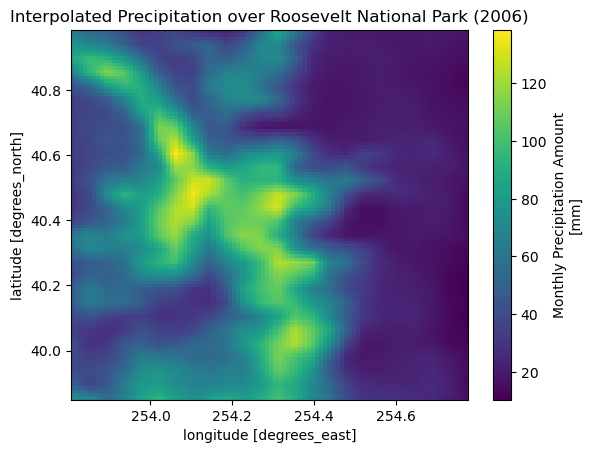

In [5]:
# create precipitation map
lat_min = float(subset.lat.min().values)
lat_max = float(subset.lat.max().values)
lon_min = float(subset.lon.min().values)
lon_max = float(subset.lon.max().values)

subset_fine = subset['precipitation'].isel(time=0).interp(
    lat=np.linspace(lat_min, lat_max, len(subset.lat)*4),
    lon=np.linspace(lon_min, lon_max, len(subset.lon)*4)
)

subset_fine.plot()
plt.title("Interpolated Precipitation over Roosevelt National Park (2006)")
plt.show()

In [6]:
# Shift longitudes from 0–360 to -180–180
subset_fine = subset_fine.assign_coords(
    lon=(((subset_fine.lon + 180) % 360) - 180)
)

# Assign CRS (WGS84)
subset_fine.rio.write_crs("EPSG:4326", inplace=True)

# Tell rioxarray which dimensions are spatial
subset_fine.rio.set_spatial_dims(x_dim="lon", y_dim="lat", inplace=True)

# Reproject
subset_fine = subset_fine.rio.reproject(forest_gdf.crs)

In [7]:
print("Forest bounds:", forest_gdf.total_bounds)  # [minx, miny, maxx, maxy]
print("Precipitation bounds:", subset_fine.rio.bounds())

Forest bounds: [-106.195438    39.8470609 -105.1901814   40.997754 ]
Precipitation bounds: (-106.19416118421053, 39.84943994745477, -105.22576069078947, 40.984559686334286)


:Overlay
   .Image.I    :Image   [x,y]   (Monthly Precipitation Amount)
   .Polygons.I :Polygons   [Longitude,Latitude]
   .Points.I   :Points   [Longitude,Latitude]

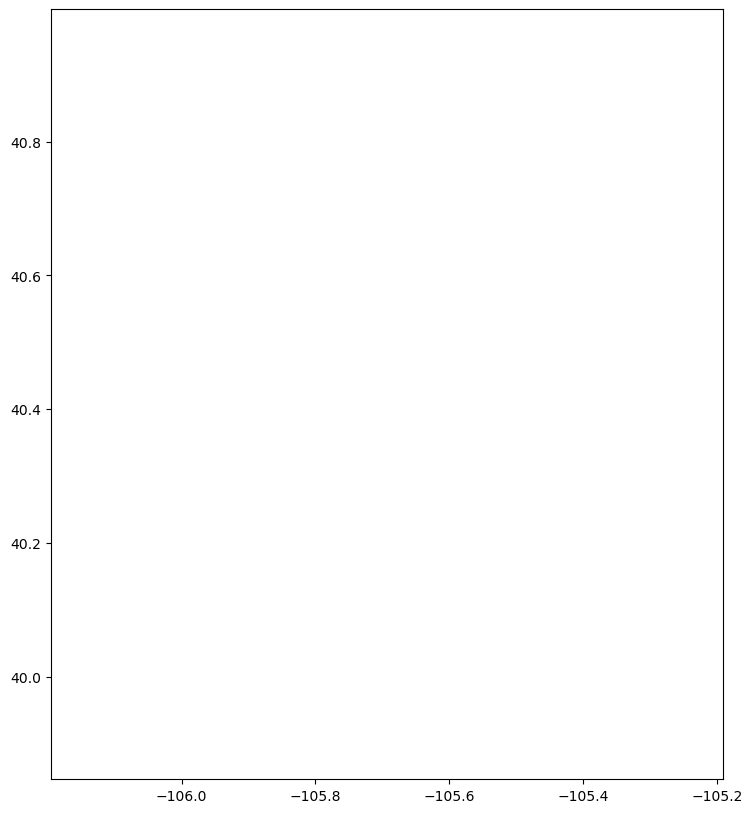

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))

precip_plot = subset_fine.hvplot.image(
     geo=True,
    cmap='Blues',
    alpha=1,
    colorbar=True,
    title="Precipitation in Roosevelt National Forest (2006)"
)

forest_plot = forest_gdf.hvplot(
    geo=True,
    color='none',
    alpha=1,
    line_width=2
)

juniper_plot = juniper_occur_gdf.hvplot(
    geo=True,
    kind='points',
    color='red',
    size=5,
    alpha=0.8
)

# Set valid aspect ratio
ax.set_aspect('equal')  
b_box = forest_gdf.total_bounds
ax.set_xlim(b_box[0],b_box[2])
ax.set_ylim(b_box[1],b_box[3])

minx, miny, maxx, maxy = forest_gdf.total_bounds

combined = precip_plot * forest_plot * juniper_plot

combined

In [9]:
print(subset.dims)

FrozenMappingWarningOnValuesAccess({'time': 60, 'lat': 28, 'lon': 24, 'crs': 1})


In [11]:
maca_2006_2099_url = ("http://thredds.northwestknowledge.net:8080/thredds/dodsC/agg_macav2metdata_pr_BNU-ESM_r1i1p1_rcp45_2006_2099_CONUS_monthly.nc")

maca_2006_2099_ds = xr.open_dataset(maca_2006_2099_url)

print(maca_2006_2099_ds)

<xarray.Dataset> Size: 4GB
Dimensions:        (time: 1128, lat: 585, lon: 1386, crs: 1)
Coordinates:
  * lat            (lat) float64 5kB 25.06 25.1 25.15 25.19 ... 49.31 49.35 49.4
  * crs            (crs) int32 4B 1
  * lon            (lon) float64 11kB 235.2 235.3 235.3 ... 292.9 292.9 292.9
  * time           (time) object 9kB 2006-01-15 00:00:00 ... 2099-12-15 00:00:00
Data variables:
    precipitation  (time, lat, lon) float32 4GB ...
Attributes: (12/46)
    description:                     Multivariate Adaptive Constructed Analog...
    id:                              MACAv2-METDATA
    naming_authority:                edu.uidaho.reacch
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    Metadata_Link:                   
    cdm_data_type:                   FLOAT
    ...                              ...
    contributor_role:                Postdoctoral Fellow
    publisher_name:                  REACCH
    publisher_email:                 reacch@uidaho.edu
 

In [12]:
# Extract forest bounds
min_lon, min_lat, max_lon, max_lat = forest_gdf.total_bounds

# Convert longitudes from [-180,180] to [0,360]
min_lon_360 = min_lon + 360 if min_lon < 0 else min_lon
max_lon_360 = max_lon + 360 if max_lon < 0 else max_lon

# Subset your dataset
maca_subset = maca_2006_2099_ds.sel(
    lat=slice(min_lat, max_lat),
    lon=slice(min_lon_360, max_lon_360)
)

print(maca_subset)

<xarray.Dataset> Size: 3MB
Dimensions:        (time: 1128, lat: 28, lon: 24, crs: 1)
Coordinates:
  * lat            (lat) float64 224B 39.85 39.9 39.94 ... 40.9 40.94 40.98
  * crs            (crs) int32 4B 1
  * lon            (lon) float64 192B 253.8 253.9 253.9 ... 254.7 254.7 254.8
  * time           (time) object 9kB 2006-01-15 00:00:00 ... 2099-12-15 00:00:00
Data variables:
    precipitation  (time, lat, lon) float32 3MB ...
Attributes: (12/46)
    description:                     Multivariate Adaptive Constructed Analog...
    id:                              MACAv2-METDATA
    naming_authority:                edu.uidaho.reacch
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    Metadata_Link:                   
    cdm_data_type:                   FLOAT
    ...                              ...
    contributor_role:                Postdoctoral Fellow
    publisher_name:                  REACCH
    publisher_email:                 reacch@uidaho.edu
    publi

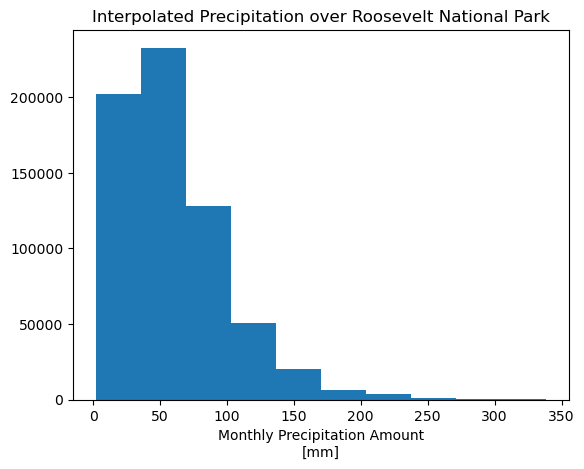

In [13]:
# create precipitation map
lat_min = float(subset.lat.min().values)
lat_max = float(subset.lat.max().values)
lon_min = float(subset.lon.min().values)
lon_max = float(subset.lon.max().values)

maca_subset_fine = subset['precipitation'].interp(
    lat=np.linspace(lat_min, lat_max, len(subset.lat)*4),
    lon=np.linspace(lon_min, lon_max, len(subset.lon)*4)
)

maca_subset_fine.plot()
plt.title("Interpolated Precipitation over Roosevelt National Park")
plt.show()

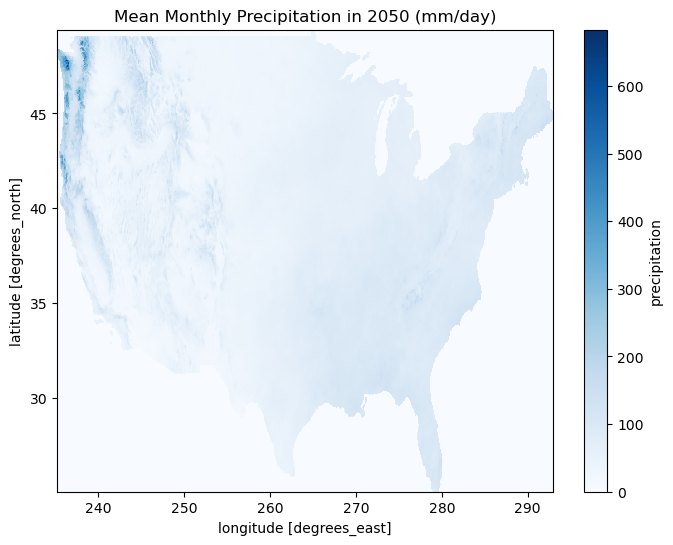

In [14]:
# Load dataset
ds = xr.open_dataset("http://thredds.northwestknowledge.net:8080/thredds/dodsC/agg_macav2metdata_pr_BNU-ESM_r1i1p1_rcp45_2006_2099_CONUS_monthly.nc")

# Convert time to datetime
ds['time'] = xr.decode_cf(ds).time

# Choose a specific year (e.g., 2050)
year = 2050
precip = ds['precipitation']

# Filter data for that year
precip_year = precip.sel(time=precip['time.year'] == year)

# Average over the 12 months
annual_mean = precip_year.mean(dim='time')  # mean monthly precipitation for that year

# Plot
plt.figure(figsize=(8, 6))
annual_mean.plot(cmap='Blues')
plt.title(f"Mean Monthly Precipitation in {year} (mm/day)")
plt.show()

:Overlay
   .Image.I    :Image   [lon,lat]   (precipitation)
   .Polygons.I :Polygons   [Longitude,Latitude]
   .Points.I   :Points   [Longitude,Latitude]

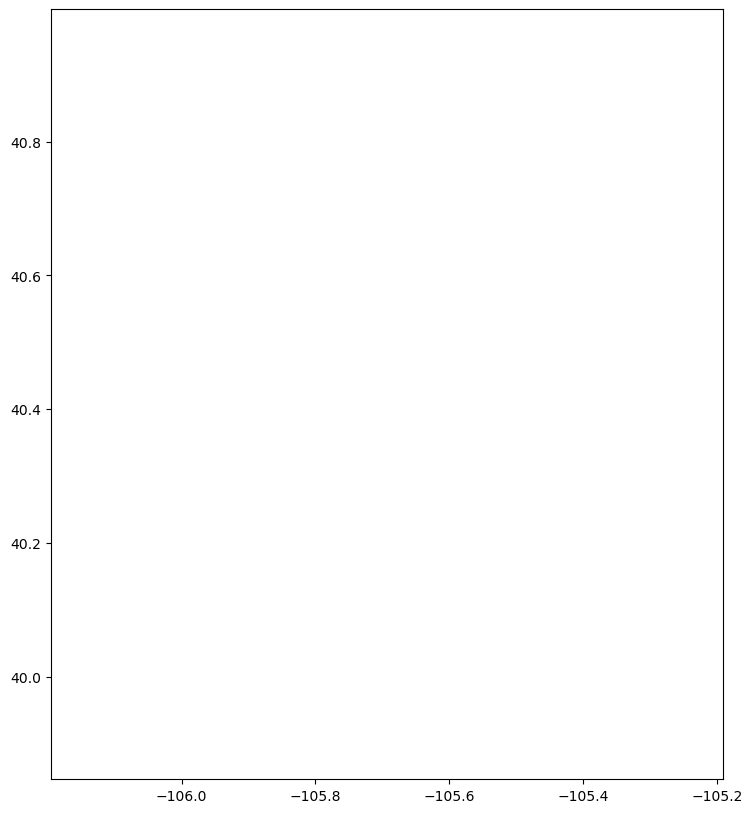

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))

# Filter to a specific year, 
selected_year = 2006
# Use datetime accessor to get the year
maca_subset_year = maca_subset_fine.sel(time=maca_subset_fine['time'].dt.year == 2006)

# Average over the 12 months of that year
maca_subset_mean = maca_subset_year.mean(dim='time')

# Plot the selected year
maca_precip_plot = maca_subset_mean.hvplot.image(
    geo=True,
    cmap='Blues',
    alpha=1,
    colorbar=True,
    title=f"Mean Monthly Precipitation in Roosevelt National Forest ({2006})"
)

forest_plot = forest_gdf.hvplot(
    geo=True,
    color='none',
    alpha=1,
    line_width=2
)

juniper_plot = juniper_occur_gdf.hvplot(
    geo=True,
    kind='points',
    color='red',
    size=5,
    alpha=0.8
)

# Set valid aspect ratio
ax.set_aspect('equal')  
b_box = forest_gdf.total_bounds
ax.set_xlim(b_box[0],b_box[2])
ax.set_ylim(b_box[1],b_box[3])

minx, miny, maxx, maxy = forest_gdf.total_bounds

combined = maca_precip_plot * forest_plot * juniper_plot

combined